In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from glob import glob
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')
import re

In [24]:
know_train = [pd.read_csv(path, index_col=0) for path in sorted(glob('./_data/train/*.csv'))]
know_test = [pd.read_csv(path, index_col=0) for path in sorted(glob('./_data/test/*.csv'))]
submission = pd.read_csv('./_data/sample_submission.csv')

## 공백 `' '` 으로 되어있는 결측치를 np.nan으로 변경

In [25]:
for train, test in zip(know_train, know_test):
    for col in test.columns:
        train[col].replace(' ', np.nan, inplace=True)
        test[col].replace(' ', np.nan, inplace=True)

In [26]:
i=0
for train, test in zip(know_train, know_test):
    print(f'{2017+i} train 결측치\n {train.isna().sum()}')
    print(f'{2017+i} test 결측치\n: {test.isna().sum()}')
    i+=1

2017 train 결측치
 aq1_1          0
aq1_2        585
aq2_1          0
aq2_2        861
aq3_1          0
            ... 
bq40        1301
bq41_1      1332
bq41_2      8222
bq41_3      1316
knowcode       0
Length: 155, dtype: int64
2017 test 결측치
: aq1_1        0
aq1_2      598
aq2_1        0
aq2_2      862
aq3_1        0
          ... 
bq39_2       0
bq40      1333
bq41_1    1371
bq41_2    8191
bq41_3    1342
Length: 154, dtype: int64
2018 train 결측치
 cq1            0
cq2            0
cq3            0
cq4            0
cq5            0
            ... 
bq40           3
bq41_1      1270
bq41_2      1388
bq41_3      7824
knowcode       0
Length: 140, dtype: int64
2018 test 결측치
: cq1          0
cq2          0
cq3          0
cq4          0
cq5          0
          ... 
bq39      1331
bq40         0
bq41_1    1298
bq41_2    1423
bq41_3    7794
Length: 139, dtype: int64
2019 train 결측치
 sq1            0
sq2            0
sq3            0
sq4            0
sq5            0
            ... 
bq30      

### 결측치가 포함된 열 확인

In [27]:
include_na_col_train = []
include_na_col_test = []
for i in range(4):
    include_na_col_train.append(know_train[i].columns[know_train[i].isna().sum()>0].tolist())
    include_na_col_test.append(know_test[i].columns[know_test[i].isna().sum()>0].tolist())

### 2017~2020 결측치가 발생한 열의 개수 모두 다름

In [28]:
print('결측치가 포함된 열 수')
for i in range(4):
    print(f'{2017+i} train : {len(include_na_col_train[0])} 개')
    print(f'{2017+i} test : {len(include_na_col_test[0])} 개')

결측치가 포함된 열 수
2017 train : 59 개
2017 test : 60 개
2018 train : 59 개
2018 test : 60 개
2019 train : 59 개
2019 test : 60 개
2020 train : 59 개
2020 test : 60 개


In [29]:
print('결측치가 포함된 열 목록')
print('='*50)
for i in range(4):
    print(f'{2017+i} train \n {include_na_col_train[0]}')
    print('-'*50)
    print(f'{2017+i} test : {include_na_col_test[0]}')
    print('='*50)

결측치가 포함된 열 목록
2017 train 
 ['aq1_2', 'aq2_2', 'aq3_2', 'aq4_2', 'aq5_2', 'aq6_2', 'aq7_2', 'aq8_2', 'aq9_2', 'aq10_2', 'aq11_2', 'aq12_2', 'aq13_2', 'aq14_2', 'aq15_2', 'aq16_2', 'aq17_2', 'aq18_2', 'aq19_2', 'aq20_2', 'aq21_2', 'aq22_2', 'aq23_2', 'aq24_2', 'aq25_2', 'aq26_2', 'aq27_2', 'aq28_2', 'aq29_2', 'aq30_2', 'aq31_2', 'aq32_2', 'aq33_2', 'aq34_2', 'aq35_2', 'aq36_2', 'aq37_2', 'aq38_2', 'aq39_2', 'aq40_2', 'aq41_2', 'bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5_1', 'bq5_2', 'bq12_2', 'bq12_3', 'bq12_4', 'bq19_1', 'bq31', 'bq32', 'bq33', 'bq34', 'bq38_1', 'bq40', 'bq41_1', 'bq41_2', 'bq41_3']
--------------------------------------------------
2017 test : ['aq1_2', 'aq2_2', 'aq3_2', 'aq4_2', 'aq5_2', 'aq6_2', 'aq7_2', 'aq8_2', 'aq9_2', 'aq10_2', 'aq11_2', 'aq12_2', 'aq13_2', 'aq14_2', 'aq15_2', 'aq16_2', 'aq17_2', 'aq18_2', 'aq19_2', 'aq20_2', 'aq21_2', 'aq22_2', 'aq23_2', 'aq24_2', 'aq25_2', 'aq26_2', 'aq27_2', 'aq28_2', 'aq29_2', 'aq30_2', 'aq31_2', 'aq32_2', 'aq33_2', 'aq34_2', 'aq35_2'

## 데이터 타입 확인
### 2017 train: float64 1개, int64 94개 object 60개

In [8]:
know_train[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9486 entries, 0 to 9485
Columns: 155 entries, aq1_1 to knowcode
dtypes: float64(1), int64(94), object(60)
memory usage: 11.3+ MB


In [9]:
# bq23 : 기술적 변화요인으로 인한 업무 대체 비율
know_train[0].select_dtypes('float64')

,bq23
idx,
0,10.0
1,50.0
2,40.0
3,30.0
4,40.0
...,...
9481,10.0
9482,20.0
9483,0.0


In [10]:
know_train[0].select_dtypes('int64').columns

Index(['aq1_1', 'aq2_1', 'aq3_1', 'aq4_1', 'aq5_1', 'aq6_1', 'aq7_1', 'aq8_1',
       'aq9_1', 'aq10_1', 'aq11_1', 'aq12_1', 'aq13_1', 'aq14_1', 'aq15_1',
       'aq16_1', 'aq17_1', 'aq18_1', 'aq19_1', 'aq20_1', 'aq21_1', 'aq22_1',
       'aq23_1', 'aq24_1', 'aq25_1', 'aq26_1', 'aq27_1', 'aq28_1', 'aq29_1',
       'aq30_1', 'aq31_1', 'aq32_1', 'aq33_1', 'aq34_1', 'aq35_1', 'aq36_1',
       'aq37_1', 'aq38_1', 'aq39_1', 'aq40_1', 'aq41_1', 'bq1', 'bq2', 'bq3',
       'bq4', 'bq5', 'bq6', 'bq7', 'bq8_1', 'bq8_2', 'bq8_3', 'bq9', 'bq10',
       'bq11', 'bq12_1', 'bq12_5', 'bq13', 'bq14', 'bq15_1', 'bq15_2',
       'bq15_3', 'bq16', 'bq17', 'bq18_1', 'bq18_2', 'bq18_3', 'bq18_4',
       'bq18_5', 'bq18_6', 'bq18_7', 'bq19', 'bq20', 'bq21', 'bq22', 'bq24_1',
       'bq24_2', 'bq24_3', 'bq24_4', 'bq24_5', 'bq24_6', 'bq24_7', 'bq24_8',
       'bq25', 'bq26', 'bq27', 'bq28', 'bq29', 'bq35', 'bq36', 'bq37', 'bq38',
       'bq39_1', 'bq39_2', 'knowcode'],
      dtype='object')

In [11]:
know_train[0].select_dtypes('object').columns

Index(['aq1_2', 'aq2_2', 'aq3_2', 'aq4_2', 'aq5_2', 'aq6_2', 'aq7_2', 'aq8_2',
       'aq9_2', 'aq10_2', 'aq11_2', 'aq12_2', 'aq13_2', 'aq14_2', 'aq15_2',
       'aq16_2', 'aq17_2', 'aq18_2', 'aq19_2', 'aq20_2', 'aq21_2', 'aq22_2',
       'aq23_2', 'aq24_2', 'aq25_2', 'aq26_2', 'aq27_2', 'aq28_2', 'aq29_2',
       'aq30_2', 'aq31_2', 'aq32_2', 'aq33_2', 'aq34_2', 'aq35_2', 'aq36_2',
       'aq37_2', 'aq38_2', 'aq39_2', 'aq40_2', 'aq41_2', 'bq4_1a', 'bq4_1b',
       'bq4_1c', 'bq5_1', 'bq5_2', 'bq12_2', 'bq12_3', 'bq12_4', 'bq19_1',
       'bq30', 'bq31', 'bq32', 'bq33', 'bq34', 'bq38_1', 'bq40', 'bq41_1',
       'bq41_2', 'bq41_3'],
      dtype='object')

# 이상치 확인
## 값의 범위
* aq*_1 : 1~5
* aq*_2 : 1~7

In [67]:
for col in know_train[0].columns:
    if re.findall('aq.*_1', col):
        val = [1,2,3,4,5]
        outofval = know_train[0].loc[know_train[0][col]>5,col].index.tolist()
        if outofval:
            print(f'{outofval}행 {col}열에 이상치 존재')
    elif re.findall('aq.*_2', col):
        val = [1,2,3,4,5,6,7]
        outofval = know_train[0].loc[know_train[0][col].astype(int)>7,col].index.tolist()
        if outofval:
            print(f'{outofval}행 {col}열에 이상치 존재')

[3985]행 aq41_1열에 이상치 발견


In [69]:
know_train[0].loc[3985, 'aq41_1']

33

In [72]:
know_train[0].loc[3985, 'aq41_1'] = 3

In [71]:
for col in know_test[0].columns:
    if re.findall('aq.*_1', col):
        val = [1,2,3,4,5]
        outofval = know_test[0].loc[know_test[0][col]>5,col].index.tolist()
        if outofval:
            print(f'{outofval}행 {col}열에 이상치 존재')
    elif re.findall('aq.*_2', col):
        val = [1,2,3,4,5,6,7]
        outofval = know_test[0].loc[know_test[0][col].astype(int)>7,col].index.tolist()
        if outofval:
            print(f'{outofval}행 {col}열에 이상치 존재')

In [63]:
know_train[0].loc[5]

aq1_1            5
aq1_2            6
aq2_1            4
aq2_2            5
aq3_1            5
             ...  
bq40             1
bq41_1        5800
bq41_2         NaN
bq41_3        2100
knowcode    522202
Name: 5, Length: 155, dtype: object

In [51]:
for i in int_data:
    print(know_train[0][col].value_counts())

0      3582
3      1593
4      1439
2      1351
5       916
6       279
1       256
7        66
4.0       4
Name: aq41_2, dtype: int64
0      3582
3      1593
4      1439
2      1351
5       916
6       279
1       256
7        66
4.0       4
Name: aq41_2, dtype: int64
0      3582
3      1593
4      1439
2      1351
5       916
6       279
1       256
7        66
4.0       4
Name: aq41_2, dtype: int64
0      3582
3      1593
4      1439
2      1351
5       916
6       279
1       256
7        66
4.0       4
Name: aq41_2, dtype: int64
0      3582
3      1593
4      1439
2      1351
5       916
6       279
1       256
7        66
4.0       4
Name: aq41_2, dtype: int64
0      3582
3      1593
4      1439
2      1351
5       916
6       279
1       256
7        66
4.0       4
Name: aq41_2, dtype: int64
0      3582
3      1593
4      1439
2      1351
5       916
6       279
1       256
7        66
4.0       4
Name: aq41_2, dtype: int64
0      3582
3      1593
4      1439
2      1351
5      

# 결측치 처리 (2017)

In [12]:
know_train[0].loc[know_train[0]['aq1_1']==1, 'aq1_2'].isna().sum()

585

* aq1_1에 1. 중요하지 않다라고 답했을 경우 aq1_2 문항을 건너뛰기 때문에 결측치 존재
## _1 문항을 1이라고 답한 행의 _2문항을 0으로 변경

In [30]:
import re
for col in know_train[0].columns:
    if re.findall('aq.*_1', col):
        na_col = re.sub('_1', '_2', col)
        know_train[0].loc[(know_train[0][col] == 1), na_col] = 0
        print(f'{na_col}열 결측치: {know_train[0][na_col].isna().sum()}')

aq1_2열 결측치: 0
aq2_2열 결측치: 0
aq3_2열 결측치: 0
aq4_2열 결측치: 0
aq5_2열 결측치: 0
aq6_2열 결측치: 0
aq7_2열 결측치: 0
aq8_2열 결측치: 0
aq9_2열 결측치: 0
aq10_2열 결측치: 0
aq11_2열 결측치: 4
aq12_2열 결측치: 0
aq13_2열 결측치: 0
aq14_2열 결측치: 3
aq15_2열 결측치: 0
aq16_2열 결측치: 0
aq17_2열 결측치: 0
aq18_2열 결측치: 0
aq19_2열 결측치: 0
aq20_2열 결측치: 0
aq21_2열 결측치: 0
aq22_2열 결측치: 0
aq23_2열 결측치: 0
aq24_2열 결측치: 0
aq25_2열 결측치: 0
aq26_2열 결측치: 0
aq27_2열 결측치: 7
aq28_2열 결측치: 0
aq29_2열 결측치: 0
aq30_2열 결측치: 0
aq31_2열 결측치: 0
aq32_2열 결측치: 11
aq33_2열 결측치: 0
aq34_2열 결측치: 0
aq35_2열 결측치: 0
aq36_2열 결측치: 0
aq37_2열 결측치: 0
aq38_2열 결측치: 0
aq39_2열 결측치: 0
aq40_2열 결측치: 0
aq41_2열 결측치: 4


In [31]:
for col in know_test[0].columns:
    if re.findall('aq.*_1', col):
        na_col = re.sub('_1', '_2', col)
        know_test[0].loc[(know_test[0][col] == 1), na_col] = 0
        print(f'{na_col}열 결측치: {know_test[0][na_col].isna().sum()}')

aq1_2열 결측치: 0
aq2_2열 결측치: 0
aq3_2열 결측치: 0
aq4_2열 결측치: 0
aq5_2열 결측치: 0
aq6_2열 결측치: 0
aq7_2열 결측치: 0
aq8_2열 결측치: 0
aq9_2열 결측치: 0
aq10_2열 결측치: 0
aq11_2열 결측치: 6
aq12_2열 결측치: 0
aq13_2열 결측치: 0
aq14_2열 결측치: 9
aq15_2열 결측치: 0
aq16_2열 결측치: 0
aq17_2열 결측치: 0
aq18_2열 결측치: 0
aq19_2열 결측치: 0
aq20_2열 결측치: 0
aq21_2열 결측치: 0
aq22_2열 결측치: 0
aq23_2열 결측치: 0
aq24_2열 결측치: 0
aq25_2열 결측치: 0
aq26_2열 결측치: 0
aq27_2열 결측치: 6
aq28_2열 결측치: 0
aq29_2열 결측치: 0
aq30_2열 결측치: 0
aq31_2열 결측치: 0
aq32_2열 결측치: 10
aq33_2열 결측치: 0
aq34_2열 결측치: 0
aq35_2열 결측치: 0
aq36_2열 결측치: 0
aq37_2열 결측치: 0
aq38_2열 결측치: 0
aq39_2열 결측치: 0
aq40_2열 결측치: 0
aq41_2열 결측치: 5


In [15]:
print(f'train\n{know_train[0].columns[know_train[0].isna().sum()>0].tolist()}')
print('-'*50)
print(f'test\n{know_test[0].columns[know_test[0].isna().sum()>0].tolist()}')

train
['aq11_2', 'aq14_2', 'aq27_2', 'aq32_2', 'aq41_2', 'bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5_1', 'bq5_2', 'bq12_2', 'bq12_3', 'bq12_4', 'bq19_1', 'bq31', 'bq32', 'bq33', 'bq34', 'bq38_1', 'bq40', 'bq41_1', 'bq41_2', 'bq41_3']
--------------------------------------------------
test
['aq11_2', 'aq14_2', 'aq27_2', 'aq32_2', 'aq41_2', 'bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5_1', 'bq5_2', 'bq12_2', 'bq12_3', 'bq12_4', 'bq19_1', 'bq30', 'bq31', 'bq32', 'bq33', 'bq34', 'bq38_1', 'bq40', 'bq41_1', 'bq41_2', 'bq41_3']


## 'aq11_2', 'aq14_2', 'aq27_2', 'aq32_2', 'aq41_2'문항에 결측치가 여전히 존재함.

In [16]:
know_train[0].loc[know_train[0]['aq11_2'].isna(), ['aq11_1','aq11_2']]

,aq11_1,aq11_2
idx,,
89,3,NaN
577,3,NaN
2422,3,NaN
4568,3,NaN


* 모두 aq11_1에 3. '중요하다' 라고 답했으나 aq11_2 항목을 건너뜀..'ㅅ';; aq11_1=3을 선택한 사람들이 aq11_2를 어떻게 답했는지 확인

In [17]:
know_train[0].loc[know_train[0]['aq11_1']==3, 'aq11_2'].value_counts()

4    1102
3     591
5     377
2      86
6      37
1       8
7       6
Name: aq11_2, dtype: int64

In [18]:
know_train[0].loc[(know_train[0]['aq11_1']==3)& (know_train[0]['aq11_2'].isna()==False), 'aq11_2'].astype(int).median()

4.0

In [19]:
know_train[0].loc[89, 'aq11_2'] = know_train[0].loc[(know_train[0]['aq11_1']==3) & (know_train[0]['aq11_2'].isna()==False), 'aq11_2'].astype(int).median()

중앙값으로 결측치를 채움

## 다른 열들도 동일한 방법으로 결측치 채우기

In [32]:
na_cols = ['aq11_2', 'aq14_2', 'aq27_2', 'aq32_2', 'aq41_2']
for col in na_cols:
    na_indexs = know_train[0][know_train[0][col].isna()].index.tolist()
    for index in na_indexs:
        forward_col = re.sub('_2', '_1', col)
        
        # _1에 같은 응답
        val_1 = know_train[0].iloc[index][forward_col]
        
        # 같은 응답한 사람들의 _2 중앙값
        val_2 = know_train[0].loc[(know_train[0][forward_col]==val_1)& (know_train[0][col].isna()==False), col].astype(int).median()
        
        know_train[0].loc[index, col] = val_2
        print(f'{index}행 {col}열의 결측치를 {forward_col}에 같은 응답(={val_1})을 한 사람들의 중앙값 {val_2}으로 대체합니다.')

89행 aq11_2열의 결측치를 aq11_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
577행 aq11_2열의 결측치를 aq11_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
2422행 aq11_2열의 결측치를 aq11_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
4568행 aq11_2열의 결측치를 aq11_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
3137행 aq14_2열의 결측치를 aq14_1에 같은 응답(=4)을 한 사람들의 중앙값 5.0으로 대체합니다.
4564행 aq14_2열의 결측치를 aq14_1에 같은 응답(=4)을 한 사람들의 중앙값 5.0으로 대체합니다.
6539행 aq14_2열의 결측치를 aq14_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
715행 aq27_2열의 결측치를 aq27_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
792행 aq27_2열의 결측치를 aq27_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
3960행 aq27_2열의 결측치를 aq27_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
4060행 aq27_2열의 결측치를 aq27_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
5388행 aq27_2열의 결측치를 aq27_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
6383행 aq27_2열의 결측치를 aq27_1에 같은 응답(=4)을 한 사람들의 중앙값 5.0으로 대체합니다.
9449행 aq27_2열의 결측치를 aq27_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
1458행 aq32_2열의 결측치를 aq32_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
2680행 aq32_2열의 결측치를 aq32_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니

In [33]:
na_cols = ['aq11_2', 'aq14_2', 'aq27_2', 'aq32_2', 'aq41_2']
for col in na_cols:
    na_indexs = know_test[0][know_test[0][col].isna()].index.tolist()
    for index in na_indexs:
        forward_col = re.sub('_2', '_1', col)
        
        # _1에 같은 응답
        val_1 = know_test[0].iloc[index][forward_col]
        
        # 같은 응답한 사람들의 _2 중앙값
        val_2 = know_test[0].loc[(know_test[0][forward_col]==val_1)& (know_test[0][col].isna()==False), col].astype(int).median()
        know_test[0].loc[index, col] = val_2
        print(f'{index}행 {col}열의 결측치를 {forward_col}에 같은 응답(={val_1})을 한 사람들의 중앙값 {val_2}으로 대체합니다.')

4319행 aq11_2열의 결측치를 aq11_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
5290행 aq11_2열의 결측치를 aq11_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
5960행 aq11_2열의 결측치를 aq11_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
6775행 aq11_2열의 결측치를 aq11_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
6877행 aq11_2열의 결측치를 aq11_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
7350행 aq11_2열의 결측치를 aq11_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
723행 aq14_2열의 결측치를 aq14_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
1234행 aq14_2열의 결측치를 aq14_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
1452행 aq14_2열의 결측치를 aq14_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
2026행 aq14_2열의 결측치를 aq14_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
3083행 aq14_2열의 결측치를 aq14_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
5078행 aq14_2열의 결측치를 aq14_1에 같은 응답(=4)을 한 사람들의 중앙값 5.0으로 대체합니다.
6270행 aq14_2열의 결측치를 aq14_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
7139행 aq14_2열의 결측치를 aq14_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
7320행 aq14_2열의 결측치를 aq14_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 대체합니다.
2302행 aq27_2열의 결측치를 aq27_1에 같은 응답(=3)을 한 사람들의 중앙값 4.0으로 

## 7749행 aq32_2열의 결측치를 aq32_1에 같은 응답(=33)을 한 사람들의 중앙값 nan으로 대체합니다.
* 33..?

In [34]:
know_test[0].iloc[7749]['aq32_1']

33

In [36]:
know_test[0].loc[7749,'aq32_1'] = 3

In [37]:
know_test[0].iloc[7749]['aq32_1']

3

In [39]:
know_test[0].loc[7749,'aq32_2'] = know_test[0].loc[(know_test[0]['aq32_1']==3) & (know_test[0]['aq32_2'].isna()==False), 'aq32_2'].astype(int).median()

In [40]:
know_test[0].loc[7749,'aq32_2']

4.0

# 결측치 채우기전, 이상치 먼저 확인해야할듯.

## 결측치 재확인

In [153]:
print(f'train\n{know_train[0].columns[know_train[0].isna().sum()>0].tolist()}')
print('-'*50)
print(f'test\n{know_test[0].columns[know_test[0].isna().sum()>0].tolist()}')

train
['bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5_1', 'bq5_2', 'bq12_2', 'bq12_3', 'bq12_4', 'bq19_1', 'bq31', 'bq32', 'bq33', 'bq34', 'bq38_1', 'bq40', 'bq41_1', 'bq41_2', 'bq41_3']
--------------------------------------------------
test
['bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5_1', 'bq5_2', 'bq12_2', 'bq12_3', 'bq12_4', 'bq19_1', 'bq30', 'bq31', 'bq32', 'bq33', 'bq34', 'bq38_1', 'bq40', 'bq41_1', 'bq41_2', 'bq41_3']


# bq 문항 이상치 확인
* bq1 : 1~21
* bq2, bq3, bq22: 1~6
* bq4 : 1~2
    * bq4_1a : 업무에서 요구되는 자격증. bq4==1일때만, 텍스트 데이터
    * bq4_1b : 업무에서 요구되는 자격증. bq4==1일때만, 텍스트 데이터
    * bq4_1c : 업무에서 요구되는 자격증. bq4==1일때만, 텍스트 데이터
* bq5 : 1~2 훈련 필요하다/필요없다
    * bq5_1 : 1~6, 훈련기간, bq5==1일때만
    * bq5_2 : 훈련종류, bq5==1일때만, 텍스트
* bq6, bq7: 1~7
* bq8_1~bq19, bq21, bq25~29: 1~5
* bq19_1 : 텍스트
* bq20 :1~4
* bq23 : 기술적 변화요인으로 인한 업무 대체 비율, float 1~100
* bq24_1~8 : 1~2
* bq30~34: 텍스트
* bq36: 성별 1.남 2.여
* bq37: 나이
* bq38: 학력
    * bq38_1: 학과 텍스트
* bq39_1: 고용형태, 1~4 선택시 bq40
* bq39_2: 5~7 선택시 bq41_3
* bq40: 1.정규직 2비정규직
* bq41_1~3 : 소득

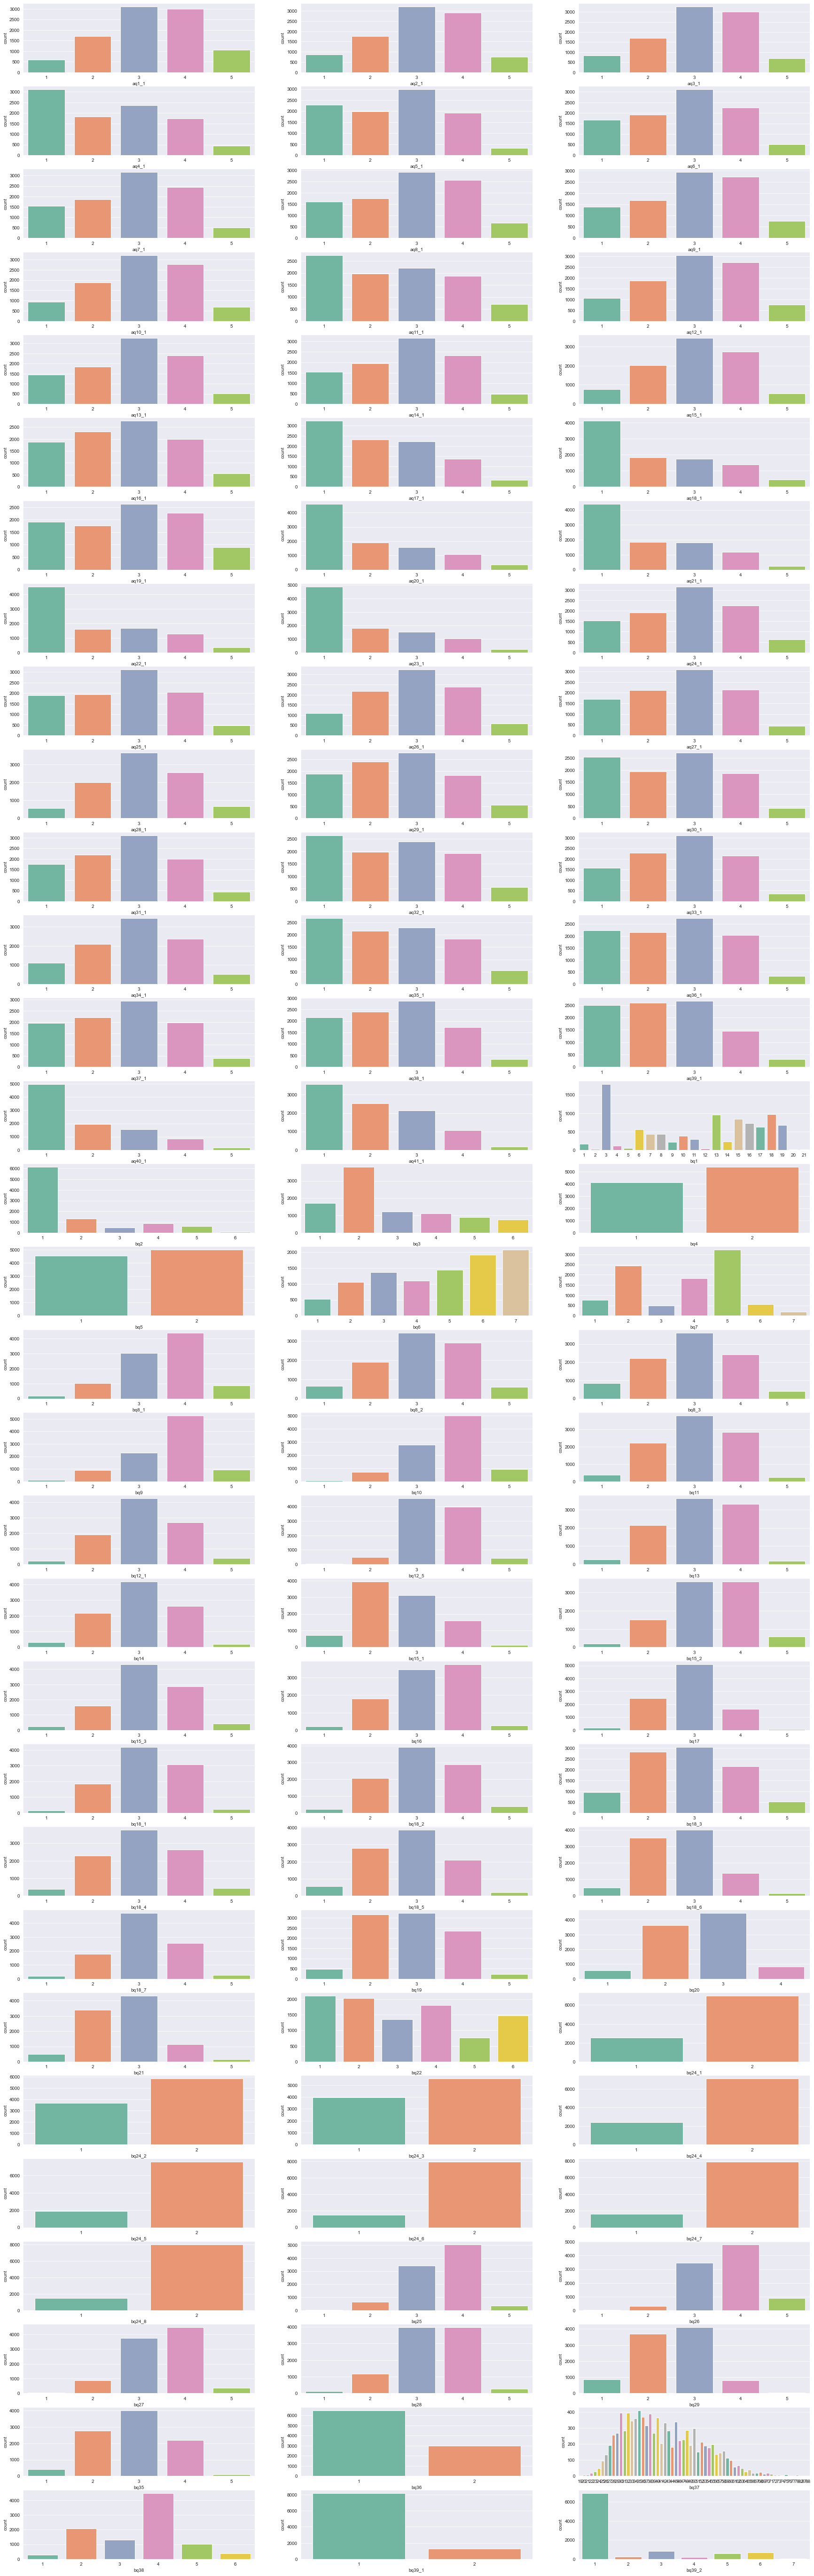

In [83]:
c = know_train[0].select_dtypes('int64').columns[:-1]
fig, ax = plt.subplots(nrows=len(c)//3, ncols=3, figsize=(30, 100))

for i, col_name in enumerate(c):
    sns.countplot(x=col_name, data=know_train[0], ax=ax[i//3][i%3], palette='Set2')
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=7, ncols=3, figsize=(30, 50))
for i, col_name in enumerate(categorical_cols):
    
    


In [80]:
know_train[0].loc[know_train[0]['aq14_2'].isna(), ['aq14_1','aq14_2']]

,aq14_1,aq14_2
idx,,
3137,4,NaN
4564,4,NaN
6539,3,NaN


In [81]:
know_train[0].loc[know_train[0]['aq32_2'].isna(), ['aq32_1','aq32_2']]

,aq27_1,aq27_2
idx,,
715,3,NaN
792,3,NaN
3960,3,NaN
4060,3,NaN
5388,3,NaN
6383,4,NaN
9449,3,NaN


In [82]:
know_train[0].loc[know_train[0]['aq41_2'].isna(), ['aq41_1','aq41_2']]

,aq41_1,aq41_2
idx,,
1798,3,NaN
6894,3,NaN
7118,3,NaN
8289,3,NaN


In [35]:
# 텍스트 데이터
text_cols = ['bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5_2', 'bq19_1', 'bq30', 'bq31', 'bq32', 'bq33', 'bq34', 'bq38_1']